# Data Preparation Stage

STEP 1.Import libraries & necessary packages

This step involves installing and importing the necessary libraries and modules required for the project. It includes libraries for data manipulation (pandas, numpy), text preprocessing (Tokenizer, pad_sequences), deep learning (tensorflow, keras), and handling imbalanced datasets (imblearn).

STEP 2.Loading Data
In this step, we load the phishing and non-phishing datasets into pandas DataFrames. We also rename a column in the non-phishing DataFrame and assign labels (1 for phishing and 0 for non-phishing) to each dataset.

STEP3. combining and Cleaning Data
Here, we combine the phishing and non-phishing DataFrames into a single DataFrame and remove any rows with missing sentences. We also filter out sentences that are too short (less than 10 characters).

Step 4: Addressing Data Imbalance with Undersampling (Optional)
In this step, we address the data imbalance issue using the Random UnderSampler from the imblearn library. We calculate the desired number of non-phishing samples to maintain a 1:3 ratio between phishing and non-phishing samples. Then, we resample the data and combine the resampled features and target into a new DataFrame.


# STEP 1.Import libraries & necessary packages

In [1]:
pip install imblearn

     -------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
# STEP1:Import Libraries and necessary packages
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization,Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.callbacks import Callback
from keras.layers import Attention, GlobalMaxPooling1D
from google.colab import drive
from keras.models import Sequential
from gensim.models import Word2Vec
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import os
import keras.backend as K

from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec





In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# STEP 2.Loading Data

In [10]:
phishing="/content/drive/My Drive/deep_learning/agumented_voicephishing.csv"
Non_phishing="/content/drive/My Drive/deep_learning/combined_sentences_nochr.csv"

phishing_df=pd.read_csv(phishing)
non_phishing_df=pd.read_csv(Non_phishing)
non_phishing_df.rename(columns={'어, 네, 될 거 같아요.':'sentence'},inplace=True)
phishing_df['label']=1
non_phishing_df['label']=0



In [ ]:
#number of samples in each phishing & non-phishing data
print(len(phishing_df))
print(len(non_phishing_df))


73109
954977


In [ ]:
#phishing text sample with labels
print(phishing_df.tail())

                                                sentence  label
73104                                  KB 금융 KB 저축은행 있대요      1
73105             지금 7.8% 대로 진행 하는 부분이고 창원까지 거리 오뎅 가지고요.      1
73106  네 그리고 최대한 대만 테슬라 주식 시장 쪽으로 5천만 원까지인데 5천만 원 검토 ...      1
73107      고객님 혹시 지금 그 사용하고 있는 휴대폰은 통신사 SKT 삼성 스마트폰 맞으세요      1
73108                 그다음에는 카톡 추가를 해서 상의하고 제 이름 넣어 드릴게요.      1


In [ ]:
#non-phishing text sample with labels
print(non_phishing_df.head())

                                       sentence  label
0  한 4시네 시 반쯤에서 5시쯤다섯 시쯤 연락을 드릴 건데 그때 시간 가능하세요?      0
1         어머니 저희가 오늘은  조금 시간이 늦어가지고 이미 마감이 됐고요.      0
2                     한 5시쯤다섯 시쯤 통화 가능하실까요? 내일?      0
3                                  예, 수고 많으십니다.      0
4                            5시쯤다섯 시쯤 통화 가능하세요?      0


# STEP3. combining and Cleaning Data

In [11]:
#combine data 
combined_df = pd.concat([phishing_df, non_phishing_df], ignore_index=True)
combined_df.dropna(subset=['sentence'],inplace=True )
X = combined_df.drop(columns=['label'])
y = combined_df['label']


In [12]:
#Combining and Cleaning Data 
# Filter out rows with sentences containing only one character
combined_df = combined_df[combined_df['sentence'].str.len() > 10]

# Step 4: Addressing Data Imbalance with Undersampling (Optional)

In [ ]:

#Calculate the number of phishing samples
phishing_count = y.value_counts()[1]

#Desired number of non-phishing samples (2 times phishing samples for a 1:2 ratio)
desired_non_phishing_count = phishing_count * 3

#Calculate the sampling strategy
sampling_strategy = {0: desired_non_phishing_count, 1: phishing_count}

#Random undersampling
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

#Combine resampled features and target
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Alternative text data for Integration

In [7]:
#common dataset for integrity of data
file_path = '/content/drive/My Drive/resampled_df.csv'
resampled_df = pd.read_csv(file_path)

In [ ]:

In this step, we perform the following actions:

Extract Sentences and Labels: Convert the 'sentence' and 'label' columns of the resampled DataFrame into lists.
Initialize Tokenizer: Create an instance of the Tokenizer class.
Fit Tokenizer on Texts: Fit the tokenizer on the list of sentences to build the vocabulary.
Convert Texts to Sequences: Transform the sentences into sequences of integers representing the indices of words in the tokenizer's vocabulary.
Calculate Sequence Lengths: Compute the lengths of all sequences and print the minimum, maximum, and average sequence lengths.

# Data tokenization & embedding transformation Stage
STEP 5: tokenization    
In this step, we perform the following actions:
1) Extract Sentences and Labels: Convert the 'sentence' and 'label' columns of the resampled DataFrame into lists.
2) Initialize Tokenizer: Create an instance of the Tokenizer class.
3) Fit Tokenizer on Texts: Fit the tokenizer on the list of sentences to build the vocabulary.
4) Convert Texts to Sequences: Transform the sentences into sequences of integers representing the indices of words in the tokenizer's vocabulary.
5) Calculate Sequence Lengths: Compute the lengths of all sequences and print the minimum, maximum, and average sequence lengths.

STEP 6:padding sequences
Padding is necessary to ensure that all sequences have the same length, which is required for batch processing in neural networks. Here, we pad all sequences to a length of 100, truncating longer sequences and padding shorter ones with zeros

STEP 7:Embedding Sequences Using Pretrained Word2Vec Model
In this step, we embed the sequences using a pretrained Word2Vec model:

1) Train Word2Vec Model: Train a Word2Vec model on the sequences. We specify a vector size of 100, a context window of 5 words, a minimum word count of 1, and use 4 worker threads for training.
2) Extract Embedding Matrix: Obtain the word vectors from the Word2Vec model, which form the embedding matrix.
3) Add Zero Vector: Add a zero vector to the embedding matrix to handle padding tokens (which have an index of 0).
4) Embed Sequences: Replace each word index in the padded sequences with its corresponding word vector from the embedding matrix, resulting in embedded sequences ready for model input.



# STEP 5: tokenization

In [11]:
sentences = resampled_df['sentence'].tolist()
labels = resampled_df['label'].tolist()

tokenizer= Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
max_length = max(len(sequences) for sequence in sequences)

In [13]:
sequence_lengths = [len(seq) for seq in sequences]
print("Min sequence length:", min(sequence_lengths))
print("Max sequence length:", max(sequence_lengths))
print("Average sequence length:", np.mean(sequence_lengths))

Min sequence length: 0
Max sequence length: 125
Average sequence length: 8.838655295517652


# STEP 6: Padding Sequences

In [14]:
padded_sequences = pad_sequences(sequences, maxlen=100)

In [15]:
#padded result
print(padded_sequences)

[[    0     0     0 ...    13  1547  1272]
 [    0     0     0 ...  6346    17 58881]
 [    0     0     0 ...  2788   718  4257]
 ...
 [    0     0     0 ...    65   333    50]
 [    0     0     0 ...    81   389   844]
 [    0     0     0 ...   610 43237  1445]]


# STEP 7: Embedding Sequences Using Pretrained Word2Vec Model


In [16]:
#embedding sequnece using Pretrained Word2Vec Model
word2vec_model = Word2Vec(sentences=sequences, vector_size=100, window=5, min_count=1, workers=4)
embedding_matrix=word2vec_model.wv.vectors

#matching size of embedding matrix with padded_seqeunces
embedding_matrix = np.vstack([np.zeros((1, embedding_matrix.shape[1])), embedding_matrix])

#embediing process
embedded_sequences = np.array([embedding_matrix[indices] for indices in padded_sequences])



In [68]:
#total shape of embedding matrix 
print(embedding_matrix.shape)

(116627, 100)


In [26]:
#shape of embedded sequence of whole data
print(embedded_sequences.shape)

(292436, 100, 100)


# Data preparation before Training
STEP 8: check for length mismatch
Before proceeding, ensure that the number of labels matches the number of embedded sequences. If there is a mismatch, an error message is printed. If they match, the data is shuffled:

1) Generate Shuffled Indices: Create a permutation of indices to shuffle the data.
2) Shuffle Data: Apply the shuffled indices to both the embedded sequences and labels to randomize their order.

STEP 9: Step 3: Split Data into Training, Validation, and Test Sets
The data is split into training, validation, and test sets:

1) First Split: Split the data into a temporary training set (X_train_temp, y_train_temp) and a test set (X_test, y_test). Stratification ensures that the class distribution remains consistent across splits.
2) Second Split: Further split the temporary training set into the final training set (X_train, y_train) and a validation set (X_val, y_val) using stratification

STEP 10: Check the Distribution of Training, Validation, and Test Data's Proportion
Finally, we print the class distribution for each dataset to ensure that the stratification worked correctly:

1) Function Definition: Define a function print_class_distribution that takes a label array and dataset name, and prints the class distribution.
2) Print Distributions: Call this function for the training, validation, and test sets to verify the proportion of each class in each set.



# STEP 8: check for length mismatch & Split Data

In [28]:
# Convert labels to numpy array
labels = np.array(labels)

#Step 8: check for length mismatch
if len(labels) != len(embedded_sequences):
    print("Error: Length mismatch between labels and embedded sequences")
else:
    # Shuffle indices
    shuffled_indices = np.random.permutation(len(embedded_sequences))

    # Use shuffled indices to shuffle embedded sequences and labels
    embedded_sequences_shuffled = embedded_sequences[shuffled_indices]
    labels_shuffled = labels[shuffled_indices]
    
    #STEP 9:  Split Data into Training, Validation, and Test Sets
    # Split data into training and temporary sets (train_temp and test) with stratification
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(
        embedded_sequences_shuffled, labels_shuffled, test_size=0.2, stratify=labels_shuffled, random_state=42
    )

    # Further split the train_temp into training and validation sets with stratification
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_temp, y_train_temp, test_size=0.25, stratify=y_train_temp, random_state=42
    )






# STEP 9: check the distribution of train,test,validation data's proportion


In [29]:
import numpy as np

# Function to print the class distribution
def print_class_distribution(y, dataset_name):
    unique, counts = np.unique(y, return_counts=True)
    distribution = dict(zip(unique, counts))
    print(f"Class distribution in {dataset_name}:")
    for label, count in distribution.items():
        print(f"Class {label}: {count} samples, {count / len(y) * 100:.2f}%")

# Print class distributions
print_class_distribution(y_train, "Training set")
print_class_distribution(y_val, "Validation set")
print_class_distribution(y_test, "Test set")

Class distribution in Training set:
Class 0: 131596 samples, 75.00%
Class 1: 43865 samples, 25.00%
Class distribution in Validation set:
Class 0: 43865 samples, 75.00%
Class 1: 14622 samples, 25.00%
Class distribution in Test set:
Class 0: 43866 samples, 75.00%
Class 1: 14622 samples, 25.00%


# Model Construction & execution layer
STEP 10: Attention layer
Weights Initialization: Define weight W and bias b which will be used in the attention mechanism.

1) Attention Calculation: Calculate attention scores and apply them to the input sequences, followed by summing the weighted input sequences to produce the output.
2) Output Shape: Define the output shape of the attention layer.

STEP 11:Define the Model Architecture

We define the model architecture with several layers:

1) Input Layer: Define the input shape based on the training data.
2) Convolutional Layer: Apply a 1D convolution with 256 filters and a kernel size of 5, followed by batch normalization and dropout.
3) Bidirectional LSTM Layers: Two bidirectional LSTM layers are added to capture sequential information.
4) Attention Layer: Apply the custom attention layer to the output of the LSTM layers.
5) Global Max Pooling: Apply global max pooling to the output of the LSTM layers.
6) Dense Layers: Add two dense layers with batch normalization and dropout to learn higher-level features.
7) Output Layer: Define the output layer with a sigmoid activation function for binary classification.

STEP 12: Compile Model
Compile the model with the Adam optimizer and binary cross-entropy loss. Additional metrics include accuracy, precision, and recall.

STEP 13: Define Callbacks for Early Stopping and Model Checkpointing
Define callbacks:

1) Early Stopping: Monitor validation loss and stop training if it doesn't improve for 10 consecutive epochs, restoring the best weights.
2) Model Checkpoint: Save the best model based on validation loss.


# STEP 11,12,13,14 combined

In [30]:
# First Attempt of 1DCONV+BI-LSTM with Attention
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# Define model architecture with enhanced layers
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

conv_layer = Conv1D(256, 5, activation='relu')(input_layer)  # Increased number of filters
conv_layer = BatchNormalization()(conv_layer)
conv_layer = Dropout(0.5)(conv_layer)

bidirectional_lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(conv_layer)  # Increased units
bidirectional_lstm_2 = Bidirectional(LSTM(64, return_sequences=True))(bidirectional_lstm_1)  # Added another LSTM layer

attention_layer = AttentionLayer()(bidirectional_lstm_2)

global_max_pooling = GlobalMaxPooling1D()(bidirectional_lstm_2)
dense_layer_1 = Dense(128, activation='relu')(global_max_pooling)  # Increased units
dense_layer_1 = BatchNormalization()(dense_layer_1)
dense_layer_1 = Dropout(0.5)(dense_layer_1)

dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)  # Added another dense layer
dense_layer_2 = BatchNormalization()(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)

output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile model with additional metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100)]        0         
                                                                 
 conv1d (Conv1D)             (None, 96, 256)           128256    
                                                                 
 batch_normalization (Batch  (None, 96, 256)           1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 96, 256)           0         
                                                                 
 bidirectional (Bidirection  (None, 96, 256)           394240    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 96, 128)           164352

In [39]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint])

# Print epoch number for every iteration
for epoch in range(1, len(history.history['loss']) + 1):
    print(f'Epoch {epoch}/{len(history.history["loss"])}')

Epoch 1/50
1371/1371 [==============================] - 571s 411ms/step - loss: 0.3758 - accuracy: 0.8298 - precision: 0.6756 - recall: 0.6139 - val_loss: 0.3077 - val_accuracy: 0.8617 - val_precision: 0.8436 - val_recall: 0.5483
Epoch 2/50
1371/1371 [==============================] - 560s 409ms/step - loss: 0.2864 - accuracy: 0.8694 - precision: 0.7721 - recall: 0.6774 - val_loss: 0.2617 - val_accuracy: 0.8824 - val_precision: 0.8161 - val_recall: 0.6836
Epoch 3/50
1371/1371 [==============================] - 560s 408ms/step - loss: 0.2663 - accuracy: 0.8799 - precision: 0.7888 - recall: 0.7094 - val_loss: 0.2526 - val_accuracy: 0.8884 - val_precision: 0.8079 - val_recall: 0.7261
Epoch 4/50
1371/1371 [==============================] - 559s 408ms/step - loss: 0.2564 - accuracy: 0.8835 - precision: 0.7940 - recall: 0.7213 - val_loss: 0.2415 - val_accuracy: 0.8900 - val_precision: 0.8430 - val_recall: 0.6880
Epoch 5/50
1371/1371 [==============================] - 560s 408ms/step - loss: 

# STEP 15: PLOT RESULT

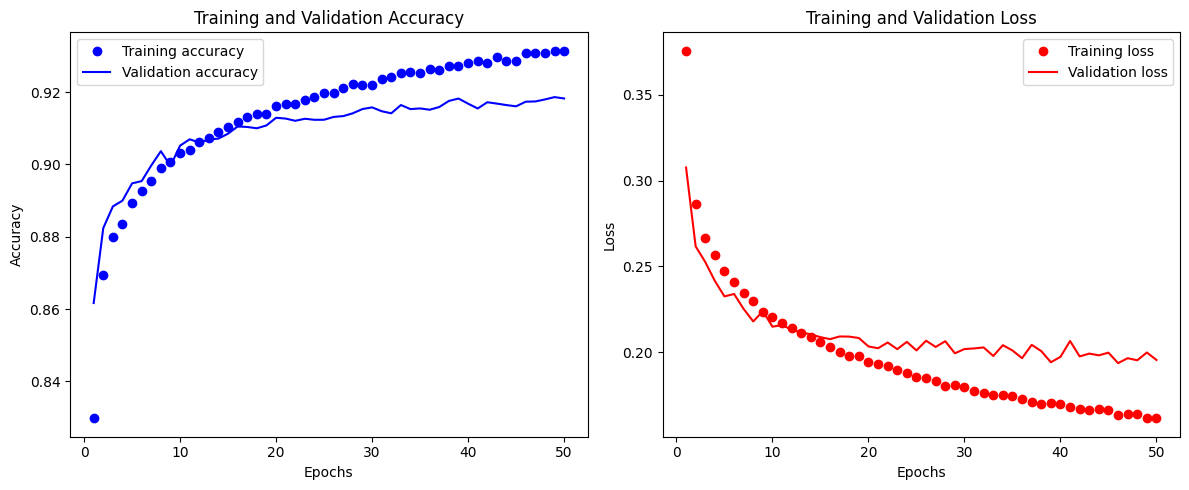

In [41]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


y_val_pred = model.predict(X_val)
# Since this is a binary classification, convert probabilities to class labels
y_val_pred = (y_val_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

1828/1828 [==============================] - 106s 57ms/step
Accuracy: 0.9182
Precision: 0.8515
Recall: 0.8151
F1 Score: 0.8329


# Experiment with simpler Bi-LSTM model(optional)
Train dataset with low dropout & batch normaalization process
early stopping excluded

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100)]        0         
                                                                 
 conv1d_4 (Conv1D)           (None, 98, 32)            9632      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_5 (Bidirecti  (None, 49, 64)            16640     
 onal)                                                           
                                                                 
 attention_layer_4 (Attenti  (None, 64)                113       
 onLayer)                                                        
                                                           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1371/1371 [==============================] - 55s 40ms/step - loss: 0.2532 - accuracy: 0.8856 - precision: 0.7899 - recall: 0.7387 - val_loss: 0.2467 - val_accuracy: 0.8872 - val_precision: 0.7651 - val_recall: 0.7921
Epoch 3/50
1371/1371 [==============================] - 55s 40ms/step - loss: 0.2364 - accuracy: 0.8936 - precision: 0.8021 - recall: 0.7625 - val_loss: 0.2526 - val_accuracy: 0.8834 - val_precision: 0.7354 - val_recall: 0.8337
Epoch 4/50
1371/1371 [==============================] - 56s 41ms/step - loss: 0.2259 - accuracy: 0.8979 - precision: 0.8078 - recall: 0.7764 - val_loss: 0.2404 - val_accuracy: 0.8896 - val_precision: 0.7533 - val_recall: 0.8303
Epoch 5/50
1371/1371 [==============================] - 54s 39ms/step - loss: 0.2193 - accuracy: 0.9024 - precision: 0.8175 - recall: 0.7846 - val_loss: 0.2311 - val_accuracy: 0.8950 - val_precision: 0.8251 - val_recall: 0.7361
Epoch 6/50
1371/1371 [==============================] - 56s 41ms/step - loss: 0.2114 - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


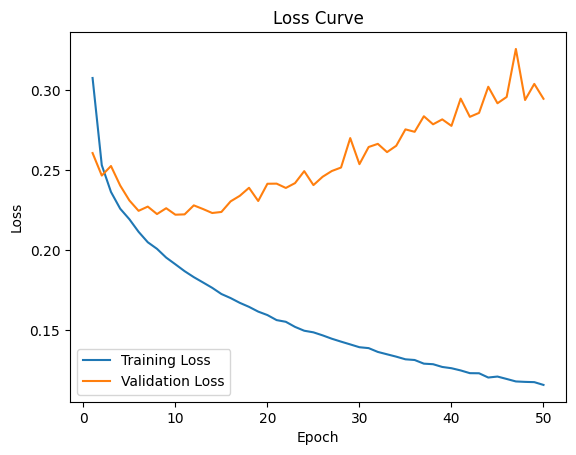

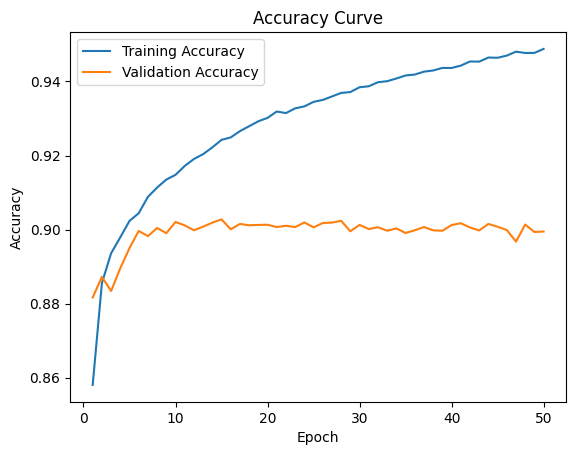

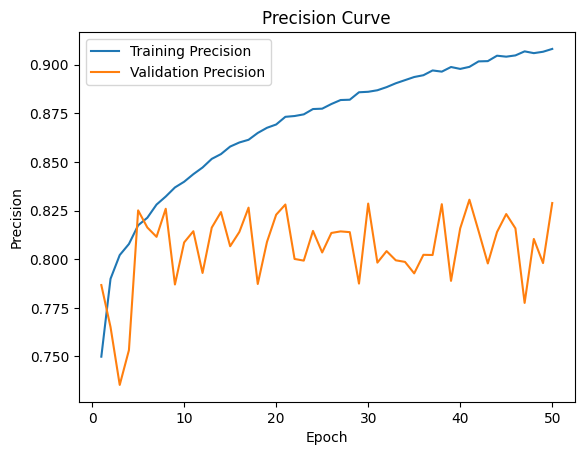

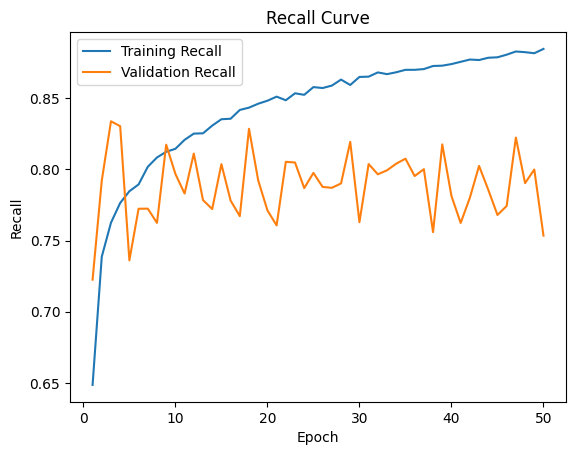

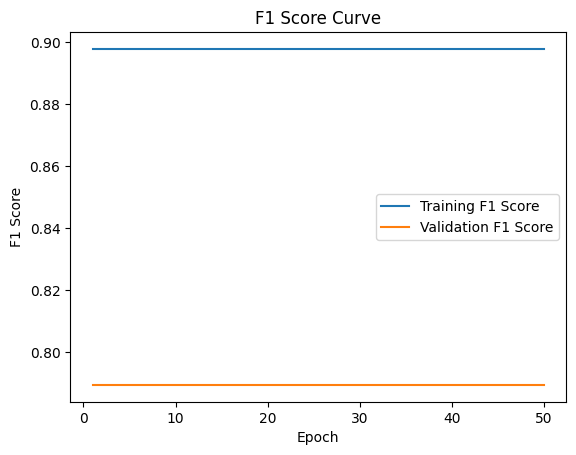

In [34]:
# Define custom attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# Define model architecture with reduced layers and added MaxPooling
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

conv_layer = Conv1D(32, 3, activation='relu')(input_layer)  # Reduced number of filters
conv_layer = MaxPooling1D(pool_size=2)(conv_layer)  # Added MaxPooling layer

bidirectional_lstm = Bidirectional(LSTM(32, return_sequences=True))(conv_layer)  # Reduced units and one LSTM layer

attention_layer = AttentionLayer()(bidirectional_lstm)

dense_layer = Dense(32, activation='relu')(attention_layer)  # Reduced units
dense_layer = Dropout(0.2)(dense_layer)  # Reduced dropout rate

output_layer = Dense(1, activation='sigmoid')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile model with additional metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

model.summary()

# Removed the early stopping callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[checkpoint])



# Print epoch number for every iteration
for epoch in range(1, len(history.history['loss']) + 1):
    print(f'Epoch {epoch}/{len(history.history["loss"])}')

# Plot the results
import matplotlib.pyplot as plt

num_epochs = len(history.history['loss'])
train_losses = history.history['loss']
val_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
train_precisions = history.history['precision']
val_precisions = history.history['val_precision']
train_recalls = history.history['recall']
val_recalls = history.history['val_recall']

# Plot and save loss curves
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# Plot and save accuracy curves
plt.figure()
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# Plot and save precision curves
plt.figure()
plt.plot(range(1, num_epochs + 1), train_precisions, label='Training Precision')
plt.plot(range(1, num_epochs + 1), val_precisions, label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision Curve')
plt.legend()
plt.savefig('precision_curve.png')

# Plot and save recall curves
plt.figure()
plt.plot(range(1, num_epochs + 1), train_recalls, label='Training Recall')
plt.plot(range(1, num_epochs + 1), val_recalls, label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall Curve')
plt.legend()
plt.savefig('recall_curve.png')

# Compute F1 scores for each epoch
from sklearn.metrics import f1_score

train_f1s = []
val_f1s = []
for epoch in range(num_epochs):
    train_preds = (model.predict(X_train, batch_size=128) > 0.5).astype(int)
    val_preds = (model.predict(X_val, batch_size=128) > 0.5).astype(int)
    train_f1s.append(f1_score(y_train, train_preds, average='binary'))
    val_f1s.append(f1_score(y_val, val_preds, average='binary'))

# Plot and save F1 score curves
plt.figure()
plt.plot(range(1, num_epochs + 1), train_f1s, label='Training F1 Score')
plt.plot(range(1, num_epochs + 1), val_f1s, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend()
plt.savefig('f1_score_curve.png')

# Evaluate on test data
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)
test_preds = (model.predict(X_test, batch_size=128) > 0.5).astype(int)
test_f1 = f1_score(y_test, test_preds, average='binary')

print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# Save the model
model.save('best_model.h5')

# Print final results
print(f'Final Training Loss: {train_losses[-1]}')
print(f'Final Validation Loss: {val_losses[-1]}')
print(f'Final Test Accuracy: {test_acc}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')